In [1]:
from tensorflow import keras
import numpy as np


In [2]:
# load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [12]:
# Scale the input features
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [13]:
# Build a DNN with 20 hidden layers of 100 neurons each,
# using He initialization and the ELU activation function.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))    # output layer

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_47 (Dense)             (None, 100)              

In [15]:
# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [16]:
# Use Nadam optimizer and early stopping
optimizer = keras.optimizers.Nadam()
checkpoint_cb = keras.callbacks.ModelCheckpoint("11_nadam.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/100
1407/1407 [==============================] - 97s 67ms/step - loss: 2.2984 - sparse_categorical_accuracy: 0.1979 - val_loss: 1.9603 - val_sparse_categorical_accuracy: 0.2624
Epoch 2/100
1407/1407 [==============================] - 99s 70ms/step - loss: 1.8786 - sparse_categorical_accuracy: 0.3138 - val_loss: 1.8875 - val_sparse_categorical_accuracy: 0.3176
Epoch 3/100
1407/1407 [==============================] - 99s 70ms/step - loss: 1.7976 - sparse_categorical_accuracy: 0.3498 - val_loss: 1.9647 - val_sparse_categorical_accuracy: 0.2834
Epoch 4/100
1407/1407 [==============================] - 100s 71ms/step - loss: 1.7472 - sparse_categorical_accuracy: 0.3729 - val_loss: 1.7319 - val_sparse_categorical_accuracy: 0.3924
Epoch 5/100
1407/1407 [==============================] - 101s 72ms/step - loss: 1.6968 - sparse_categorical_accuracy: 0.3923 - val_loss: 1.7034 - val_sparse_categorical_accuracy: 0.3930
Epoch 6/100
1407/1407 [==============================] - 100s 71ms/step -

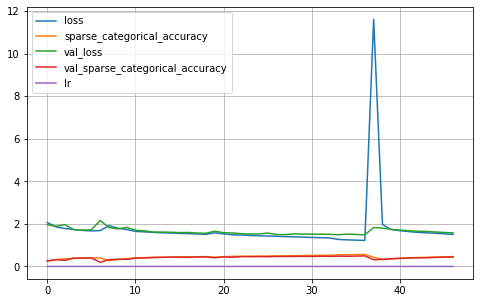

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# Batch Normalization
model_bn = keras.models.Sequential()
model_bn.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_bn.add(keras.layers.BatchNormalization())
for _ in range(20):
    model_bn.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model_bn.add(keras.layers.BatchNormalization())
model_bn.add(keras.layers.Dense(10, activation="softmax"))    # output layer

2022-08-15 12:55:17.812509: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-15 12:55:17.813673: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-15 12:55:17.816428: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model_bn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1

In [ ]:
[(var.name, var.trainable) for var in model_bn.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
optimizer = keras.optimizers.Nadam()
checkpoint_cb = keras.callbacks.ModelCheckpoint("11_nadam_bn.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model_bn.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
history = model_bn.fit(X_train_scaled, y_train, epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stopping_cb, lr_scheduler])

2022-08-15 13:01:50.243083: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-15 13:01:50.268896: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099940000 Hz


Epoch 1/100
1407/1407 [==============================] - 157s 104ms/step - loss: 2.0642 - sparse_categorical_accuracy: 0.2611 - val_loss: 1.6995 - val_sparse_categorical_accuracy: 0.3962
Epoch 2/100
1407/1407 [==============================] - 153s 109ms/step - loss: 1.7409 - sparse_categorical_accuracy: 0.3743 - val_loss: 1.7137 - val_sparse_categorical_accuracy: 0.3946
Epoch 3/100
1407/1407 [==============================] - 156s 111ms/step - loss: 1.6607 - sparse_categorical_accuracy: 0.4121 - val_loss: 1.5493 - val_sparse_categorical_accuracy: 0.4436
Epoch 4/100
1407/1407 [==============================] - 159s 113ms/step - loss: 1.6012 - sparse_categorical_accuracy: 0.4346 - val_loss: 1.5314 - val_sparse_categorical_accuracy: 0.4574
Epoch 5/100
1407/1407 [==============================] - 158s 112ms/step - loss: 1.5537 - sparse_categorical_accuracy: 0.4501 - val_loss: 1.5086 - val_sparse_categorical_accuracy: 0.4704
Epoch 6/100
1407/1407 [==============================] - 155s 110

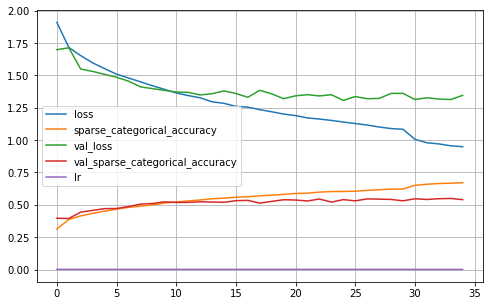

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [3]:
# SELU
# First, we need to normalize the data (mean 0, std 1)
# The solutions notebook does it like this:
# X_means = X_train.mean(axis=0)
mean, std = X_train.mean(), X_test.std()
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std
model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_selu.add(keras.layers.Dense(10, activation="softmax"))

2022-08-18 10:05:19.125943: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-18 10:05:19.126954: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-18 10:05:19.130478: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model_selu.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)              

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
optimizer = keras.optimizers.Nadam()
checkpoint_cb = keras.callbacks.ModelCheckpoint("11_nadam_selu.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model_selu.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
history = model_selu.fit(X_train_norm, y_train, epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/100
1407/1407 [==============================] - 102s 69ms/step - loss: 2.1291 - sparse_categorical_accuracy: 0.2354 - val_loss: 1.8627 - val_sparse_categorical_accuracy: 0.3226
Epoch 2/100
1407/1407 [==============================] - 101s 72ms/step - loss: 1.8100 - sparse_categorical_accuracy: 0.3498 - val_loss: 1.8359 - val_sparse_categorical_accuracy: 0.3566
Epoch 3/100
1407/1407 [==============================] - 96s 68ms/step - loss: 1.6917 - sparse_categorical_accuracy: 0.4023 - val_loss: 1.7240 - val_sparse_categorical_accuracy: 0.4072
Epoch 4/100
1407/1407 [==============================] - 99s 70ms/step - loss: 1.6298 - sparse_categorical_accuracy: 0.4215 - val_loss: 1.7093 - val_sparse_categorical_accuracy: 0.4112
Epoch 5/100
1407/1407 [==============================] - 95s 68ms/step - loss: 1.5606 - sparse_categorical_accuracy: 0.4443 - val_loss: 1.6278 - val_sparse_categorical_accuracy: 0.4310
Epoch 6/100
1407/1407 [==============================] - 97s 69ms/step - 

<function matplotlib.pyplot.show(close=None, block=None)>

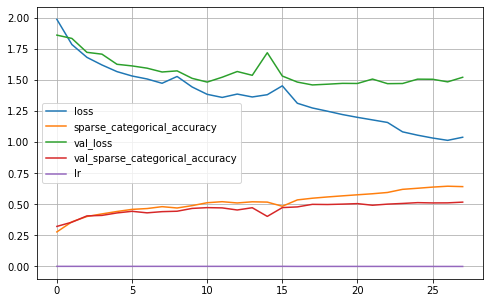

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show

In [5]:
# Regularize the model with alpha dropout
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    # model_reg.add(keras.layers.AlphaDropout(0.2))
    model_reg.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_reg.add(keras.layers.AlphaDropout(0.2))
model_reg.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
optimizer = keras.optimizers.Nadam()
checkpoint_cb = keras.callbacks.ModelCheckpoint("11_nadam_selu_reg.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [7]:
model_reg.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [8]:
history = model_reg.fit(X_train_norm, y_train, epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stopping_cb, lr_scheduler])

2022-08-18 10:17:56.219195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-18 10:17:56.244303: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099940000 Hz


Epoch 1/100
1407/1407 [==============================] - 104s 71ms/step - loss: 2.1043 - sparse_categorical_accuracy: 0.2598 - val_loss: 1.9797 - val_sparse_categorical_accuracy: 0.3248
Epoch 2/100
1407/1407 [==============================] - 110s 78ms/step - loss: 1.8125 - sparse_categorical_accuracy: 0.3455 - val_loss: 1.9519 - val_sparse_categorical_accuracy: 0.3302
Epoch 3/100
1407/1407 [==============================] - 108s 77ms/step - loss: 1.7468 - sparse_categorical_accuracy: 0.3743 - val_loss: 1.8070 - val_sparse_categorical_accuracy: 0.3748
Epoch 4/100
1407/1407 [==============================] - 109s 78ms/step - loss: 1.6803 - sparse_categorical_accuracy: 0.3971 - val_loss: 1.9792 - val_sparse_categorical_accuracy: 0.3684
Epoch 5/100
1407/1407 [==============================] - 112s 79ms/step - loss: 1.7045 - sparse_categorical_accuracy: 0.3899 - val_loss: 1.8276 - val_sparse_categorical_accuracy: 0.4182
Epoch 6/100
1407/1407 [==============================] - 108s 77ms/ste

In [19]:
# MC dropout
y_probas = np.stack([model_reg(X_test_norm, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [21]:
np.round(model_reg.predict(X_test_norm[:1]), 2)

array([[0.02, 0.01, 0.14, 0.11, 0.19, 0.1 , 0.25, 0.17, 0.  , 0.01]],
      dtype=float32)

In [22]:
np.round(y_probas[:, :1], 2)

array([[[0.05, 0.03, 0.1 , 0.2 , 0.09, 0.23, 0.1 , 0.15, 0.03, 0.03]],

       [[0.05, 0.03, 0.09, 0.19, 0.09, 0.16, 0.1 , 0.21, 0.03, 0.04]],

       [[0.08, 0.03, 0.17, 0.13, 0.15, 0.12, 0.13, 0.13, 0.03, 0.03]],

       [[0.05, 0.03, 0.09, 0.22, 0.08, 0.2 , 0.09, 0.17, 0.03, 0.03]],

       [[0.05, 0.03, 0.09, 0.18, 0.1 , 0.15, 0.11, 0.21, 0.03, 0.04]],

       [[0.05, 0.04, 0.09, 0.16, 0.1 , 0.13, 0.1 , 0.25, 0.02, 0.06]],

       [[0.05, 0.04, 0.08, 0.18, 0.1 , 0.13, 0.11, 0.24, 0.02, 0.06]],

       [[0.07, 0.08, 0.09, 0.14, 0.09, 0.11, 0.11, 0.18, 0.04, 0.09]],

       [[0.05, 0.03, 0.12, 0.15, 0.13, 0.14, 0.15, 0.17, 0.02, 0.04]],

       [[0.05, 0.03, 0.11, 0.17, 0.12, 0.15, 0.14, 0.17, 0.02, 0.03]],

       [[0.04, 0.02, 0.11, 0.21, 0.08, 0.25, 0.1 , 0.13, 0.03, 0.02]],

       [[0.05, 0.04, 0.08, 0.18, 0.09, 0.15, 0.1 , 0.23, 0.03, 0.05]],

       [[0.03, 0.03, 0.1 , 0.15, 0.12, 0.13, 0.12, 0.27, 0.01, 0.04]],

       [[0.05, 0.05, 0.08, 0.18, 0.09, 0.13, 0.11, 0.22, 0.03, 0

In [23]:
np.argmax(np.round(model_reg.predict(X_test_norm[:1]), 2))

6

In [30]:
y_pred = np.reshape(np.argmax(y_proba, axis=1), (10000, 1))

In [32]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.2972